# **Nombre de la entrega:** Actividad Semanal -- 7 Regresiones y K means.
# **Nombre:** Cristian Jhovany Montelongo Medina.
# **Matrucula:** A01793580
# **Materia:** Ciencia y Analitica de Datos.
# **Profesor:** Maria de la Paz Rico Fernandez
# **Fecha:** 9 de Noviembre del 2022


# Linear Models

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

### Para evaluar el error en los modelos de regresión

**1. Error cuadrático medio (RMSE)**

>  $RMSE = \sqrt{\tfrac{1}{n}\sum_{i=1}^{n}(yi-ŷi)^2}$









Representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado.

Como la raíz cuadrada de una varianza, RMSE se puede interpretar como la desviación estándar de la varianza inexplicada, y tiene la propiedad útil de estar en las mismas unidades que la variable de respuesta.

Los valores más bajos de RMSE indican un mejor ajuste. RMSE es una buena medida de la precisión con que el modelo predice la respuesta, y es el criterio más importante para ajustar si el propósito principal del modelo es la predicción.

**2. Error absoluto medio (MAE)**

> $MAE=\tfrac{1}{n}\sum_{i=1}^{n} \left|yi-ŷi\right|$

Es el promedio de la diferencia absoluta entre el valor observado y los valores predichos. El error absoluto medio o MAE es un puntaje lineal

**3. R-cuadrado**

Indica la bondad o la aptitud del modelo, a menudo se utiliza con fines descriptivos y muestra que también las variables independientes seleccionadas explican la variabilidad en sus variables dependiente. 

> $R^2 = 1-\frac{\sum_{i}^{n}\left|yi-\hat{yi} \right|}{\sum_{i}^{n}\left|yi-\bar{yi} \right|}$

Tiene la propiedad útil de que su escala es intuitiva, va de 0 a 1, con 0 indicando que el modelo propuesto no mejora la predicción sobre el modelo medio y 1 indica una predicción perfecta. 

Una de las dificultades de R-cuadrado es que solo puede aumentar a medida que se agregan predictores al modelo de regresión. Este aumento es artificial cuando los predictores no mejoran el ajuste del modelo. Para remediar esto, una estadística relacionada es R-cuadrado ajustado, incorpora los grados de libertad del modelo. El R-cuadrado ajustado disminuirá a medida que agreguen predictores si el aumento en el ajuste del modelo no compensa la pérdidas de grados de libertad. Asimismo, aumentará a medida que se agreguen predictores si vale la pena el aumento en el ajuste del modelo.

**El R-cuadrado ajustado** siempre se debe usar con modelos con más de una variable de predicción. **Se interpreta como la proporción de la varianza total que se explica por el modelo.**

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
536,4.549560,38.557608
985,7.598037,30.261508
214,3.383359,41.280329
707,5.193986,31.971063
258,3.635282,47.945892
324,3.887598,37.640914
177,3.221590,45.637944
631,4.945363,33.758201
708,5.195441,40.837133
445,4.262271,44.140036


In [3]:
#¿falta algún dato?
df.isnull().values.any()

False

In [4]:
df.describe().round(2)

,Number of Units,Manufacturing Cost
count,1000.00,1000.00
mean,4.47,40.05
std,1.34,10.60
min,1.00,20.00
25%,3.59,32.91
50%,4.44,38.35
75%,5.32,44.53
max,10.00,100.00


In [5]:
X = df[['Number of Units']]
y = df[['Manufacturing Cost']]

In [6]:
len(X)

1000

In [7]:
y.describe().round(2)

,Manufacturing Cost
count,1000.00
mean,40.05
std,10.60
min,20.00
25%,32.91
50%,38.35
75%,44.53
max,100.00


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


## Hacemos el ejercicio con los datos de entrenamiento

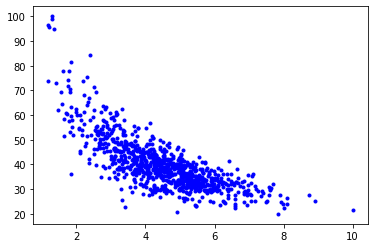

In [9]:
#Graficamos los datos de entrenamiento
plt.plot(X_train,y_train,'b.')

In [73]:
#Importando regresion lineal
from sklearn.linear_model import LinearRegression

#Definiendo modelo
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


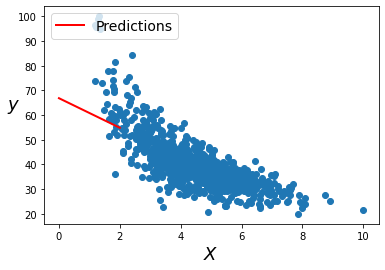

In [11]:
# Contruimos la línea que mejor se ajuste
X_train_fit = np.linspace(0, 2, 100)
y_train_fit = linear_reg.predict(X_train_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_train_fit, y_train_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [12]:
#Obteniendo el coeficiente y el interceptor
linear_reg.coef_, linear_reg.intercept_

(array([[-5.98882699]]), array([66.83650741]))

The model estimates:

$ŷ=-5.6X+66.8$


In [13]:
print("Coeficiente de determinación R^2:", linear_reg.score(X_train, y_train))

Coeficiente de determinación R^2: 0.5746524649404298


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [14]:
yhat = linear_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


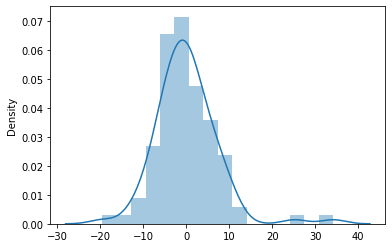

In [15]:
sns.distplot(y_test-yhat)

In [16]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = yhat,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 7.108963321847682


Las predicciones del modelo final se alejan en promedio 7.10 unidades del valor real.

In [17]:
#Sacando la R2
precision = linear_reg.score(X_test, y_test)
precision

0.6116251549562579

## Regresión polinomial

In [18]:
#Regresión polinomial
from sklearn.preprocessing import PolynomialFeatures
poli_reg = PolynomialFeatures(degree = 2)

In [19]:
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

In [20]:
#Definimos el algoritmo a utilizar
from sklearn import linear_model
pr = linear_model.LinearRegression()

In [21]:
#Entrenamos el modelo
pr.fit(X_train_poli, y_train)

LinearRegression()

In [22]:
#Realizamos una predicción
Y_pred_pr = pr.predict(X_test_poli)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


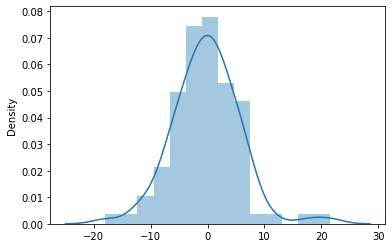

In [23]:
sns.distplot(y_test-Y_pred_pr)

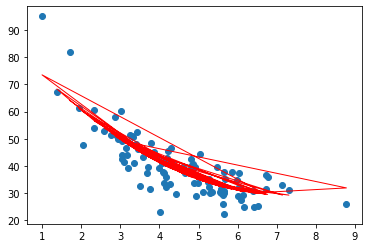

In [24]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred_pr, color='red', linewidth=1)
plt.show()

In [25]:
print('Valor de la pendiente o coeficiente "a":')
print(pr.coef_)

Valor de la pendiente o coeficiente "a":
[[  0.         -16.40638102   1.13136095]]


In [26]:
print('Valor de la intersección o coeficiente "b":')
print(pr.intercept_)

Valor de la intersección o coeficiente "b":
[88.80179909]


The model estimates:

$ŷ=-16.4X+1.1X^2+88.8$

In [27]:
from sklearn.metrics import mean_squared_error
rmse_poly = mean_squared_error(
        y_true  = y_test,
        y_pred  =  Y_pred_pr,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_poly}")


El error (rmse) de test es: 5.832771301068424


In [28]:
#Sacando la R2
print('Precisión del modelo:')
print(pr.score(X_train_poli, y_train))

Precisión del modelo:
0.6552276217097528


## Ridge Regression

In [29]:
from sklearn.linear_model import Ridge
#Definimos el modelo
model = Ridge()
model.fit(X_train,y_train)

Ridge()

In [30]:
#Entrenado el modelo
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


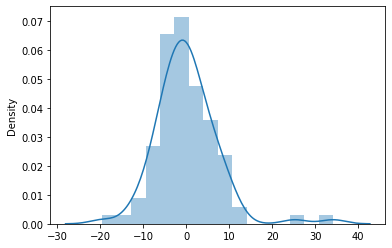

In [31]:
sns.distplot(y_test-y_pred)

In [32]:
from sklearn.metrics import mean_absolute_error,r2_score
print(r2_score(y_test,y_pred))

0.611578926493084


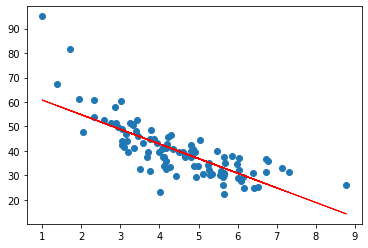

In [33]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
rmse_ridge = mean_squared_error(
        y_true  = y_test,
        y_pred  =  y_pred,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 7.10938640108989


In [35]:
#Sacando la R2
precision = model.score(X_test, y_test)
precision

0.611578926493084

## Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
# defininición del modelo
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train,y_train)

Lasso()

In [37]:
#Predicción 
y_pred_lasso = model_lasso.predict(X_test)

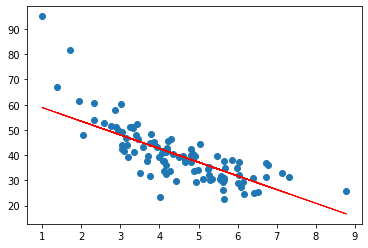

In [38]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_lasso, color='red', linewidth=1)
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
rmse_ridge = mean_squared_error(
        y_true  = y_test,
        y_pred  =  y_pred_lasso,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 7.2156139275269515


In [40]:
from sklearn.metrics import mean_absolute_error,r2_score
print(r2_score(y_test,y_pred_lasso))

0.5998847335404536


In [41]:
precision = model_lasso.score(X_test, y_test)
precision

0.5998847335404536

# Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13447,2652501215,20140702T000000,860000.0,4,1.75,1880,3720,1.5,0,0,...,7,1880,0,1924,0,98109,47.6431,-122.356,2090,4095
16210,1236300307,20140905T000000,565000.0,3,2.25,1700,8800,1.0,0,0,...,7,850,850,1969,0,98033,47.6863,-122.189,2180,8960
6835,3361400190,20150226T000000,190000.0,3,1.00,1040,8910,1.0,0,0,...,6,1040,0,1943,0,98168,47.5024,-122.320,1330,9720
18793,2525049263,20140709T000000,2680000.0,5,3.00,4290,20445,2.0,0,0,...,11,4290,0,1985,0,98039,47.6217,-122.239,3620,22325
13893,9525100040,20150407T000000,705000.0,4,3.25,2740,5339,2.5,0,0,...,9,2740,0,2004,0,98103,47.6706,-122.356,1770,4820
11565,4204400339,20140925T000000,194000.0,3,1.00,1400,7955,1.0,0,0,...,7,1400,0,1964,0,98055,47.4848,-122.221,1160,14959
9814,2862100260,20141003T000000,540000.0,4,1.75,1840,4280,1.0,0,0,...,7,920,920,1918,0,98105,47.6681,-122.320,1660,4280
17401,6819100020,20140529T000000,1425000.0,4,4.25,4960,6000,2.5,0,0,...,11,3680,1280,1909,2003,98109,47.6437,-122.356,2160,4080
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
9998,7370600045,20150402T000000,640000.0,3,1.75,1680,8100,1.0,0,2,...,8,1680,0,1950,0,98177,47.7212,-122.364,1880,7750


In [43]:
#¿falta algún dato?
df.isnull().values.any()

False

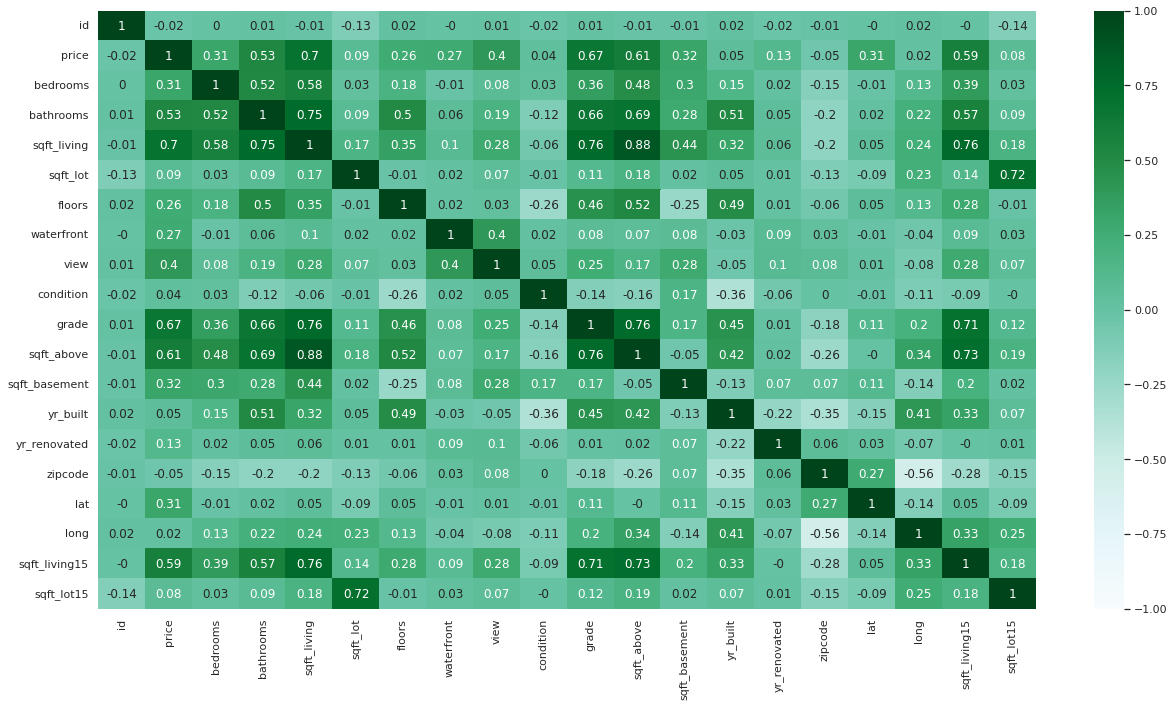

In [44]:
corrs = df.corr().round(2)

sns.set(rc = {'figure.figsize': (21,11)})
sns.heatmap(corrs, vmin=-1, vmax=1, cmap ='BuGn', annot_kws={'size':12}, annot=True)

Las variables que tienen más correlación con la variable precio es sqft_living, grede, sqft_above y sqft_living15 y son las que se utilizarán para generar las regresiones múltiples

In [45]:
y = df[['price']]
X = df[['sqft_living','grade','sqft_above', 'sqft_living15']]

In [46]:
#Estandarizando los datos (variables predictoras)
from sklearn import preprocessing
dfr_s = preprocessing.scale(X)
dfr_scale = pd.DataFrame(dfr_s, columns=X.columns)
dfr_scale.head()

,sqft_living,grade,sqft_above,sqft_living15
0,-0.979835,-0.558836,-0.734708,-0.943355
1,0.533634,-0.558836,0.460841,-0.432686
2,-1.426254,-1.409587,-1.229834,1.070140
3,-0.130550,-0.558836,-0.891699,-0.914174
4,-0.435422,0.291916,-0.130895,-0.272190


In [47]:
#Generando la partición
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfr_scale, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 4)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 4)


## Regresion Lineal Múltiple

In [48]:
#Regresión lineal
from sklearn.linear_model import LinearRegression

#Definimos el  modelo
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [49]:
#Obteniendo el coeficiente y el interceptor
linear_reg.coef_, linear_reg.intercept_

(array([[206902.13360381, 123477.88365986, -70347.94054903,
          20545.55629171]]), array([539671.96375741]))

$206,902*sqft_living+123,477*grade-70,347*sqft_above	+20,545*sqft_living15+539,671$

In [50]:
#Predicción 
y_pred_mult = linear_reg.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error
mse_mult = mean_squared_error(
        y_true  = y_test,
        y_pred  =  y_pred_mult,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {mse_mult}")


El error (rmse) de test es: 268199.5553047453


In [52]:
from sklearn.metrics import mean_absolute_error,r2_score
print(r2_score(y_test,y_pred_mult))

0.5434354191181615


In [53]:
#Calculando la R2
precision = linear_reg.score(X_test, y_test)
precision

0.5434354191181615

## Regresión Polinomial

In [54]:
#Regresión polinomial
from sklearn.preprocessing import PolynomialFeatures
poli_reg2 = PolynomialFeatures(degree = 2)

In [55]:
X_train_poli2 = poli_reg.fit_transform(X_train)
X_test_poli2 = poli_reg.fit_transform(X_test)

In [56]:
#Definimos el algoritmo a utilizar
from sklearn import linear_model
poly = linear_model.LinearRegression()

In [57]:
#Entrenamos el modelo
poly.fit(X_train_poli2, y_train)

LinearRegression()

In [58]:
#Realizamos una predicción
Y_pred_poly = poly.predict(X_test_poli2)

In [59]:
print('Valor de la pendiente o coeficiente "a":')
print(poly.coef_)

Valor de la pendiente o coeficiente "a":
[[      0.          193389.12702506  118372.91887325 -108663.63746423
    34065.07036588  -77137.13232337   69511.58079301  174903.38987296
    10105.48753299   16838.64276158  -20200.44540403  -25630.0090936
   -80236.60872497  -42276.65664742   24097.28534434]]


In [60]:
print('Valor de la intersección o coeficiente "b":')
print(poly.intercept_)

Valor de la intersección o coeficiente "b":
[506698.27508426]


In [61]:
from sklearn.metrics import mean_squared_error
rmse_poly2 = mean_squared_error(
        y_true  = y_test,
        y_pred  =  Y_pred_poly,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_poly2}")


El error (rmse) de test es: 229966.81849062524


In [62]:
print('Precisión del modelo:')
print(poly.score(X_train_poli2, y_train))

Precisión del modelo:
0.6147069808530736


## Regresion Ridge

In [63]:
from sklearn.linear_model import Ridge
#Definimos el modelo
Ridge_model = Ridge()
Ridge_model.fit(X_train,y_train)

Ridge()

In [64]:
pred_r = Ridge_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


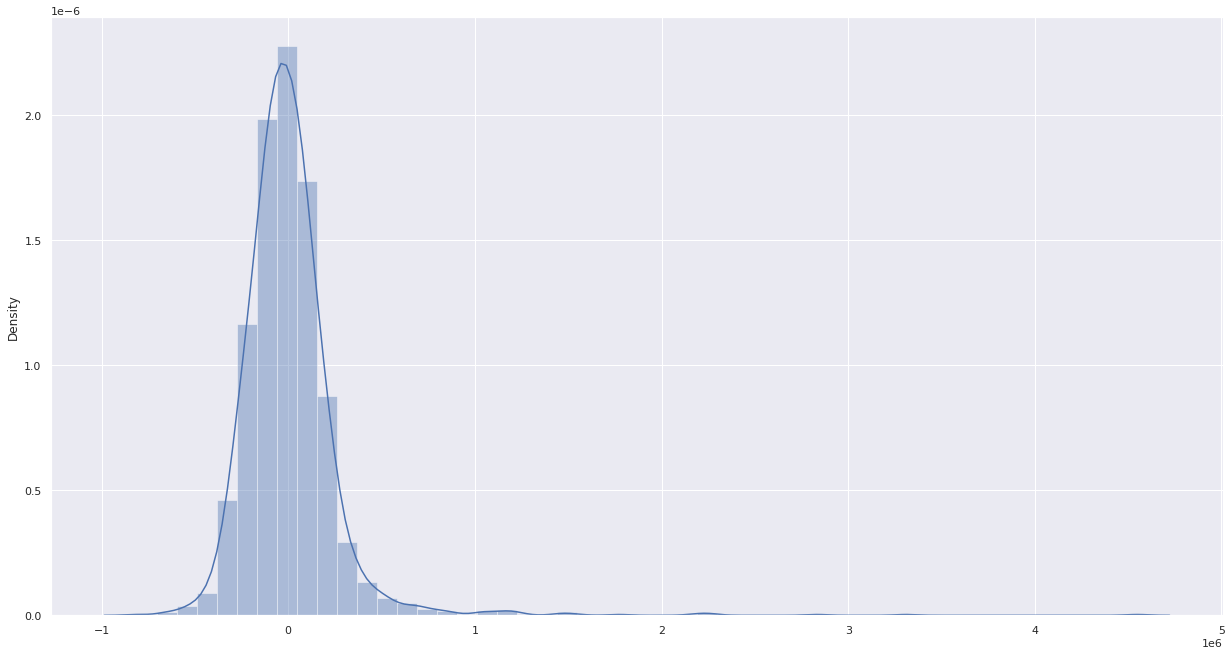

In [65]:
sns.distplot(y_test-pred_r)

In [66]:
from sklearn.metrics import mean_absolute_error,r2_score
print(r2_score(y_test,pred_r))

0.5434338081812287


In [67]:
from sklearn.metrics import mean_squared_error
rmse_ridge = mean_squared_error(
        y_true  = y_test,
        y_pred  =  pred_r,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 268200.0284603579


In [68]:
#Sacando la R2
precision = Ridge_model.score(X_test, y_test)
precision

0.5434338081812287

## Regresion Lasso

In [69]:
from sklearn.linear_model import Lasso
# defininición del modelo
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train,y_train)

Lasso()

In [70]:
#Predicción 
y_pred_lasso2 = model_lasso.predict(X_test)

In [71]:
from sklearn.metrics import mean_squared_error
rmse_ridge = mean_squared_error(
        y_true  = y_test,
        y_pred  =  y_pred_lasso2,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 268199.453426756


In [72]:
#Sacando la R2
precision = model_lasso.score(X_test, y_test)
precision

0.5434357659783389

### **Explica tus resultados**.

**Que método conviene más a la empresa**

Metrica RMSE con regularizacion de Ridge 

**¿por que?**

Es la que optiene mejor precision en sus valores llegando a un .67

**¿que porcentajes de entrenamiento y evaluación usaste?**

Se tomo un 90% para el conjunto de entrenamiento y un 10% para prueba

**¿que error tienes?** 

7.10

**¿es bueno?** 

No es un numero optimo sin embargo aumentando la cantidad de datos probablemente pueda mejorar.

**¿cómo lo sabes?**

Se busca obtener un numero que se considere optimo en base a la experiencia y tipo de problema que se presenta, en base a ello podemos determinar realizar mas evaluaciones con otras metricas y asi poder encontrar el mejor modelo.